# 培训背景


**背景：
您的客户是一家跨国金融公司，向消费者提供多种产品。尽管主要的贡献来自线下分销渠道，但是有多种渠道可以为消费者提供这些产品。离线渠道通过其代理商网络向消费者出售金融产品，并且根据政府法规，这些代理商必须获得销售金融产品的认证。针对不同类别的金融产品，有多种认证计划。 

由于这个离线渠道对公司的总销售额贡献很大，因此公司专注于招聘和认证他们以建立大型代理商网络。在这里，主要的挑战是培训他们获得销售各种类型产品的认证。

在多个程序中，将为您提供针对培训课程测试明智的学员绩效的数据集。您的任务是根据人口统计信息和培训计划/测试详细信息来预测此类测试的性能。这将使您的客户找出最重要的因素，从而导致受训者更好地参与并提高表现，从而加强其培训问题。

![image.png](attachment:image.png)**

# 数据预处理

## 数据准备

导入相关的库

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Hackathon/train_HK6lq50.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

In [5]:
df_test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Hackathon/test_wF0Ps6O.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         31349 non-null  object 
 1   program_id                 31349 non-null  object 
 2   program_type               31349 non-null  object 
 3   program_duration           31349 non-null  int64  
 4   test_id                    31349 non-null  int64  
 5   test_type                  31349 non-null  object 
 6   difficulty_level           31349 non-null  object 
 7   trainee_id                 31349 non-null  int64  
 8   gender                     31349 non-null  object 
 9   education                  31349 non-null  object 
 10  city_tier                  31349 non-null  int64  
 11  age                        19558 non-null  float64
 12  total_programs_enrolled    31349 non-null  int64  
 13  is_handicapped             31349 non-null  obj

测试、训练集先统一一张表，方便数据清洗

In [0]:
df=pd.concat([df,df_test],ignore_index=True,sort=False)

In [7]:
df

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0.0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1.0
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1.0
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1.0
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104491,18820_22,T_3,T,134,22,offline,intermediate,18820,F,No Qualification,2,22.0,2,N,1.0,NaN
104492,1641_96,V_1,V,133,96,offline,easy,1641,F,Matriculation,1,41.0,2,N,3.0,NaN
104493,7010_157,Y_1,Y,136,157,online,easy,7010,M,Bachelors,2,NaN,3,N,4.0,NaN
104494,14895_179,Z_1,Z,136,179,offline,easy,14895,F,Matriculation,3,NaN,1,N,1.0,NaN


## 数据初步探索

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         104496 non-null  object 
 1   program_id                 104496 non-null  object 
 2   program_type               104496 non-null  object 
 3   program_duration           104496 non-null  int64  
 4   test_id                    104496 non-null  int64  
 5   test_type                  104496 non-null  object 
 6   difficulty_level           104496 non-null  object 
 7   trainee_id                 104496 non-null  int64  
 8   gender                     104496 non-null  object 
 9   education                  104496 non-null  object 
 10  city_tier                  104496 non-null  int64  
 11  age                        64976 non-null   float64
 12  total_programs_enrolled    104496 non-null  int64  
 13  is_handicapped             10

In [9]:
df.sample(5)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
89875,19208_30,T_3,T,134,30,online,easy,19208,F,Matriculation,2,44.0,2,Y,2.0,NaN
23241,3401_12,T_4,T,120,12,offline,intermediate,3401,F,High School Diploma,2,44.0,2,N,2.0,1.0
30559,17922_140,Y_2,Y,120,140,offline,hard,17922,M,Matriculation,1,57.0,2,N,4.0,1.0
5551,13567_146,Y_2,Y,120,146,online,easy,13567,M,High School Diploma,1,NaN,2,N,4.0,1.0
10545,13814_32,T_2,T,117,32,offline,easy,13814,F,High School Diploma,2,NaN,2,N,1.0,0.0


In [10]:
df.head(10)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0.0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1.0
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1.0
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1.0
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1.0
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0.0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1.0
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1.0
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,NaN,3,N,3.0,1.0
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0


In [11]:
df[df.test_id==84]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1.0
124,8516_84,V_3,V,131,84,offline,intermediate,8516,M,High School Diploma,2,42.0,4,N,2.0,0.0
329,18396_84,V_3,V,131,84,offline,intermediate,18396,F,High School Diploma,1,56.0,3,N,3.0,0.0
354,3468_84,V_3,V,131,84,offline,intermediate,3468,M,Matriculation,1,NaN,2,N,2.0,1.0
371,5157_84,V_3,V,131,84,offline,intermediate,5157,F,High School Diploma,2,44.0,2,N,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103219,8844_84,V_3,V,131,84,offline,intermediate,8844,M,High School Diploma,3,47.0,2,N,4.0,NaN
103794,9238_84,V_3,V,131,84,offline,intermediate,9238,F,Matriculation,1,33.0,4,N,4.0,NaN
103956,19931_84,V_3,V,131,84,offline,intermediate,19931,M,Matriculation,1,NaN,2,N,3.0,NaN
104004,293_84,V_3,V,131,84,offline,intermediate,293,F,Matriculation,3,31.0,2,N,4.0,NaN


In [12]:
df[df.program_id=="Y_1"]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0.0
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
12,15848_149,Y_1,Y,136,149,offline,intermediate,15848,M,High School Diploma,1,NaN,4,N,4.0,1.0
19,13920_151,Y_1,Y,136,151,offline,hard,13920,F,Bachelors,3,28.0,2,N,4.0,0.0
20,10498_159,Y_1,Y,136,159,online,easy,10498,M,High School Diploma,3,27.0,2,N,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104446,16587_156,Y_1,Y,136,156,online,easy,16587,F,High School Diploma,1,28.0,2,N,4.0,NaN
104470,114_150,Y_1,Y,136,150,offline,intermediate,114,M,Matriculation,1,46.0,2,N,4.0,NaN
104480,15769_152,Y_1,Y,136,152,offline,hard,15769,M,High School Diploma,1,NaN,2,N,4.0,NaN
104482,13482_153,Y_1,Y,136,153,offline,hard,13482,M,Bachelors,1,48.0,2,N,5.0,NaN


In [13]:
df[df.program_type=="Y"]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0.0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1.0
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
12,15848_149,Y_1,Y,136,149,offline,intermediate,15848,M,High School Diploma,1,NaN,4,N,4.0,1.0
13,423_126,Y_3,Y,135,126,offline,intermediate,423,M,Matriculation,3,NaN,4,N,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104481,5517_119,Y_4,Y,121,119,online,easy,5517,F,Matriculation,4,NaN,7,Y,4.0,NaN
104482,13482_153,Y_1,Y,136,153,offline,hard,13482,M,Bachelors,1,48.0,2,N,5.0,NaN
104486,20042_132,Y_3,Y,135,132,online,easy,20042,M,High School Diploma,3,30.0,6,Y,4.0,NaN
104489,10683_148,Y_2,Y,120,148,online,easy,10683,M,Matriculation,1,21.0,6,Y,3.0,NaN


In [14]:
df[df.trainee_id==17019]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
5313,17019_159,Y_1,Y,136,159,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
7988,17019_156,Y_1,Y,136,156,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
19159,17019_157,Y_1,Y,136,157,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
49691,17019_149,Y_1,Y,136,149,offline,intermediate,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
67209,17019_154,Y_1,Y,136,154,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
72445,17019_151,Y_1,Y,136,151,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1.0
78004,17019_160,Y_1,Y,136,160,online,easy,17019,M,Bachelors,3,28.0,2,N,4.0,NaN


In [15]:
df[df.trainee_id==16303]#online 一般online是easy? 年龄是否有重要影响？

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
35,16303_157,Y_1,Y,136,157,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
4878,16303_149,Y_1,Y,136,149,offline,intermediate,16303,M,High School Diploma,4,42.0,4,N,4.0,1.0
12336,16303_152,Y_1,Y,136,152,offline,hard,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
14239,16303_154,Y_1,Y,136,154,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,1.0
15172,16303_153,Y_1,Y,136,153,offline,hard,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
32115,16303_151,Y_1,Y,136,151,offline,hard,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
54859,16303_156,Y_1,Y,136,156,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,0.0
80320,16303_158,Y_1,Y,136,158,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,NaN
87431,16303_159,Y_1,Y,136,159,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,NaN
90174,16303_155,Y_1,Y,136,155,online,easy,16303,M,High School Diploma,4,42.0,4,N,4.0,NaN


**通过以上数据勘察，大致了解到，df字段分三种：program（培训项目）、test（测试）、trainee（学员）,每条记录代表某个trainee参加某个test的记录，其中一个program对应多个test.因此假设成绩是否通过，主要通过以上三个对象的影响，每个对象又有多种不同的属性，会让结果进一步细分。**

In [16]:
#查看缺失值
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
age,39520,37.8
is_pass,31349,30.0
trainee_engagement_rating,108,0.1
is_handicapped,0,0.0
total_programs_enrolled,0,0.0


In [17]:
# 查看数据的值，具体类别
for i in ['program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass']:
    print(df[i].value_counts())
    print()

Y_3    9589
Y_1    9521
T_3    8919
Y_4    7138
T_4    6841
U_1    6792
V_4    6159
T_2    6080
Y_2    6056
V_3    4859
V_1    4856
T_1    4521
U_2    4421
Z_3    3652
Z_2    3016
V_2    2720
Z_1    2669
X_1    1911
X_3    1698
X_2    1119
S_2    1013
S_1     946
Name: program_id, dtype: int64

Y    32304
T    26361
V    18594
U    11213
Z     9337
X     4728
S     1959
Name: program_type, dtype: int64

134    18635
120    15913
136    13888
121    10977
122    10580
135    10535
131     9380
117     6080
133     4856
130     3652
Name: program_duration, dtype: int64

61     1142
149    1117
125    1100
43     1074
21     1070
       ... 
6       192
4       191
3       188
8       176
9       170
Name: test_id, Length: 188, dtype: int64

offline    62256
online     42240
Name: test_type, dtype: int64

easy            57211
intermediate    29537
hard            14777
vary hard        2971
Name: difficulty_level, dtype: int64

6324     23
14171    23
2535     21
6372     21
3837     20


In [18]:
#查看数据分布
df.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,104496.000000,104496.000000,104496.000000,104496.000000,64976.000000,104496.000000,104388.000000,73147.000000
mean,128.209386,90.937672,9846.168045,2.248478,36.478038,2.586223,2.397776,0.695408
std,6.892792,51.219793,5706.697072,1.011789,9.045325,1.238415,1.327130,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5041.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9648.500000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14555.250000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [19]:
# 是否有重复值。
print(df["id"].duplicated().sum())

0


标签值分布


In [20]:
df['is_pass'].value_counts(normalize=True)

1.0    0.695408
0.0    0.304592
Name: is_pass, dtype: float64

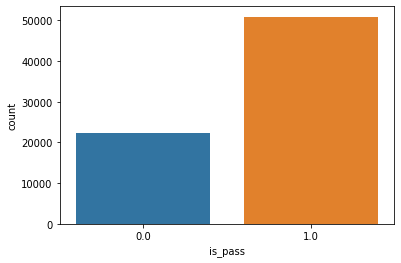

In [21]:
sns.countplot(df['is_pass'])

单变量探索


<Figure size 1584x432 with 0 Axes>

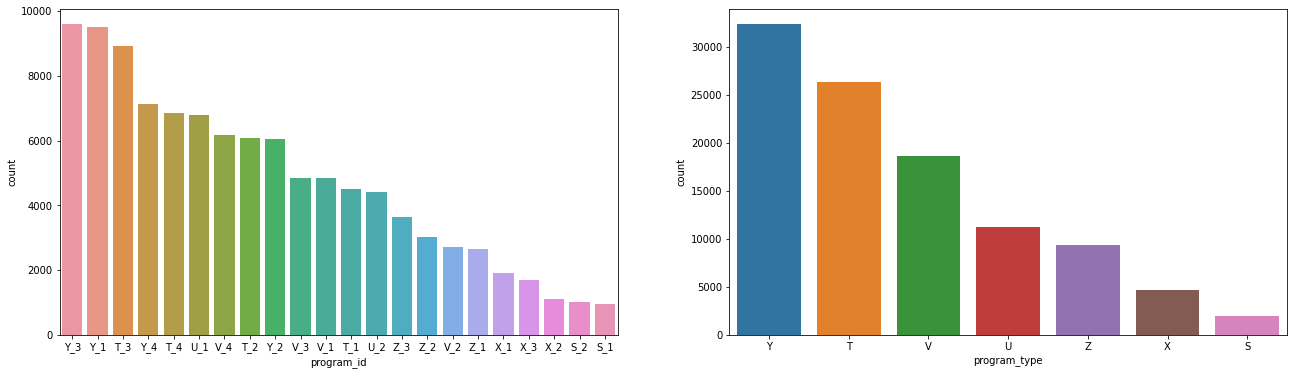

In [22]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.countplot(df['program_id'],order = df['program_id'].value_counts().index)
plt.subplot(122)
sns.countplot(df['program_type'],order = df['program_type'].value_counts().index)

<Figure size 1584x432 with 0 Axes>

[Text(0, 0, 'High School Diploma'),
 Text(0, 0, 'Matriculation'),
 Text(0, 0, 'Bachelors'),
 Text(0, 0, 'Masters'),
 Text(0, 0, 'No Qualification')]

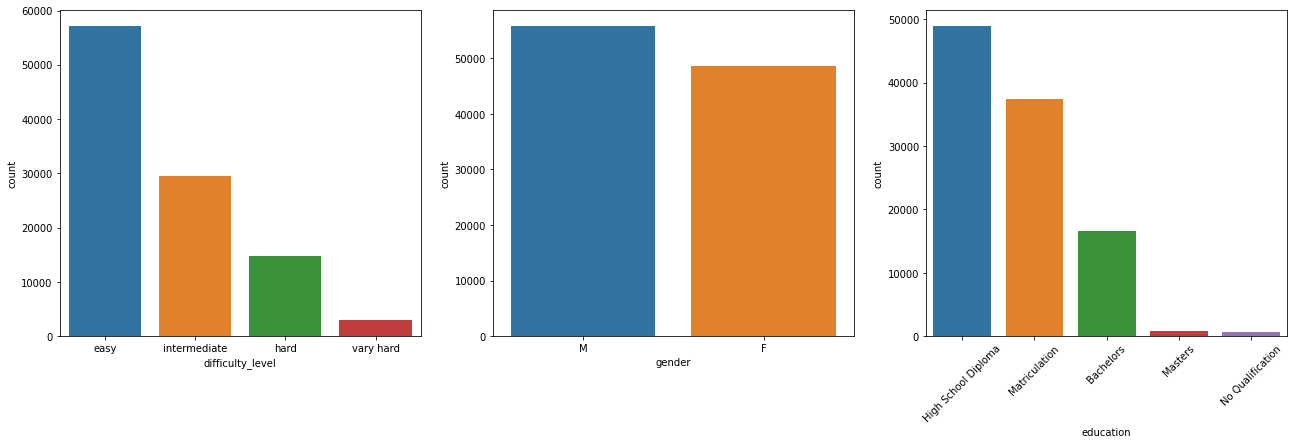

In [23]:
plt.figure(figsize=(22, 6))
plt.subplot(131)
sns.countplot(df['difficulty_level'],order = df['difficulty_level'].value_counts().index)
plt.subplot(132)
sns.countplot(df['gender'],order = df['gender'].value_counts().index)
plt.subplot(133)
chart=sns.countplot(df['education'],order = df['education'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

<Figure size 1584x432 with 0 Axes>

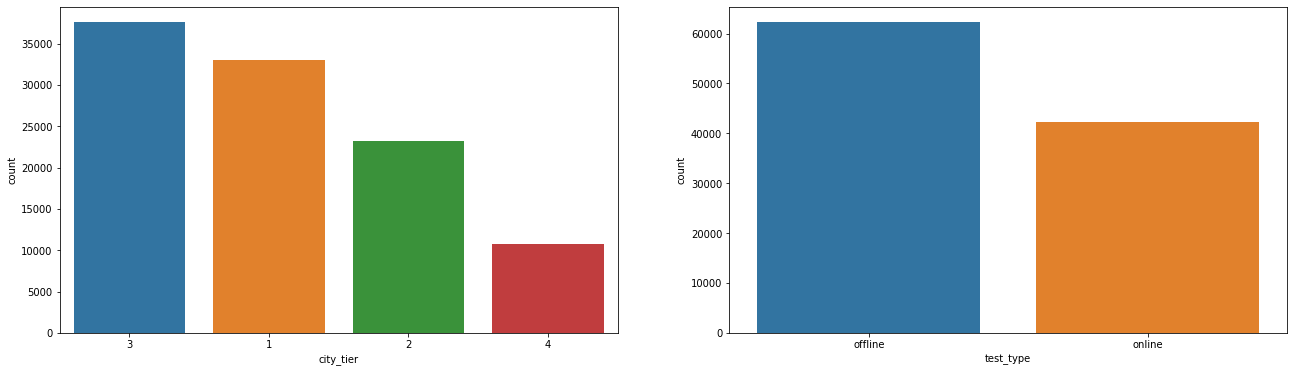

In [24]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.countplot(df['city_tier'],order = df['city_tier'].value_counts().index)
plt.subplot(122)
sns.countplot(df['test_type'],order = df['test_type'].value_counts().index)

<Figure size 1584x432 with 0 Axes>

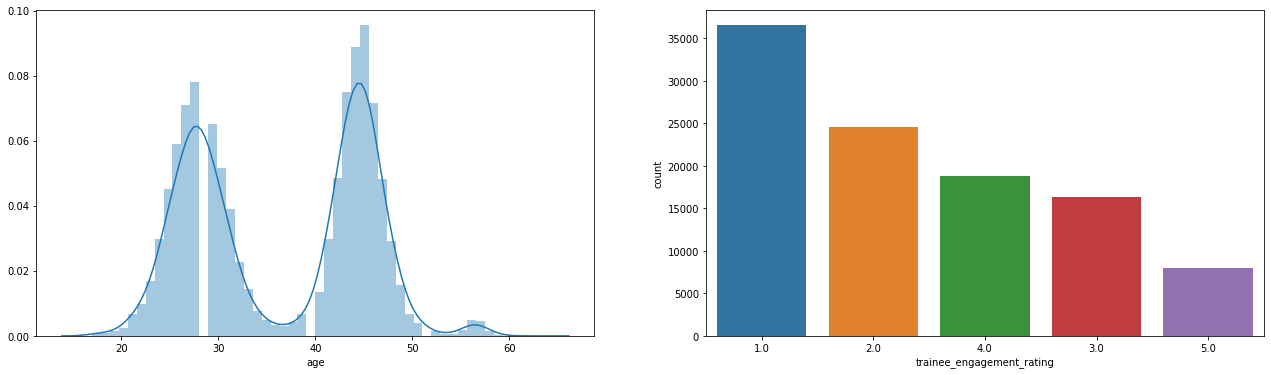

In [25]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.distplot(df['age'])
plt.subplot(122)
sns.countplot(df['trainee_engagement_rating'],order = df['trainee_engagement_rating'].value_counts().index)

双变量探索


<Figure size 1584x432 with 0 Axes>

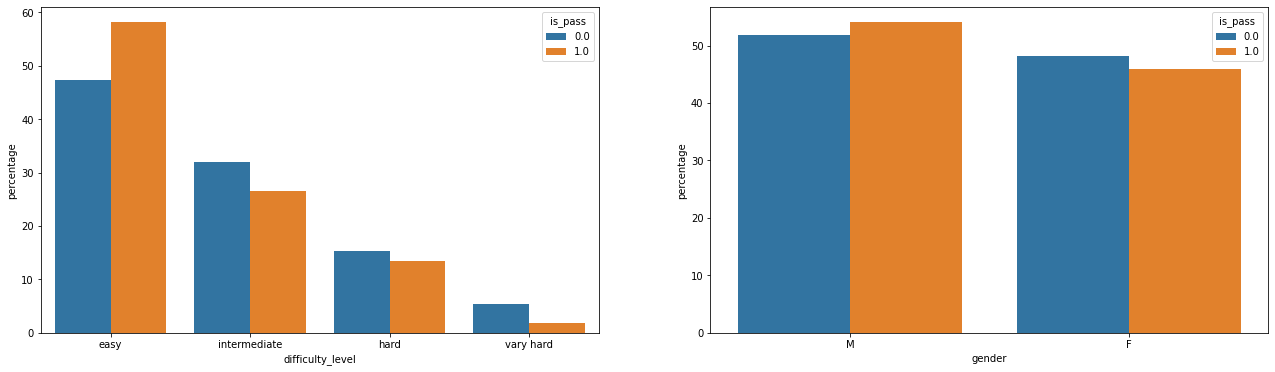

In [26]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
city_tier_counts = (df.groupby(['is_pass'])['difficulty_level'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="difficulty_level", y="percentage", hue="is_pass", data=city_tier_counts)
plt.subplot(122)
test_type_counts = (df.groupby(['is_pass'])['gender'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="gender", y="percentage", hue="is_pass", data=test_type_counts)

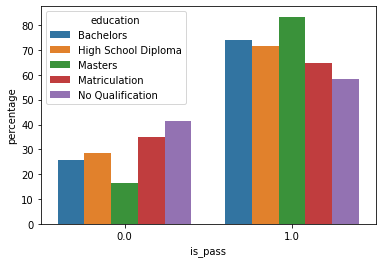

In [27]:
education_counts = (df.groupby(['education'])['is_pass'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('education'))
sns.barplot(x="is_pass", y="percentage", hue="education", data=education_counts)

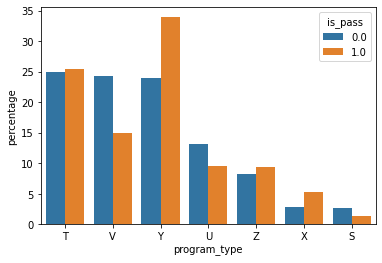

In [28]:
education_counts = (df.groupby(['is_pass'])['program_type'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="program_type", y="percentage", hue="is_pass", data=education_counts)

<Figure size 1584x432 with 0 Axes>

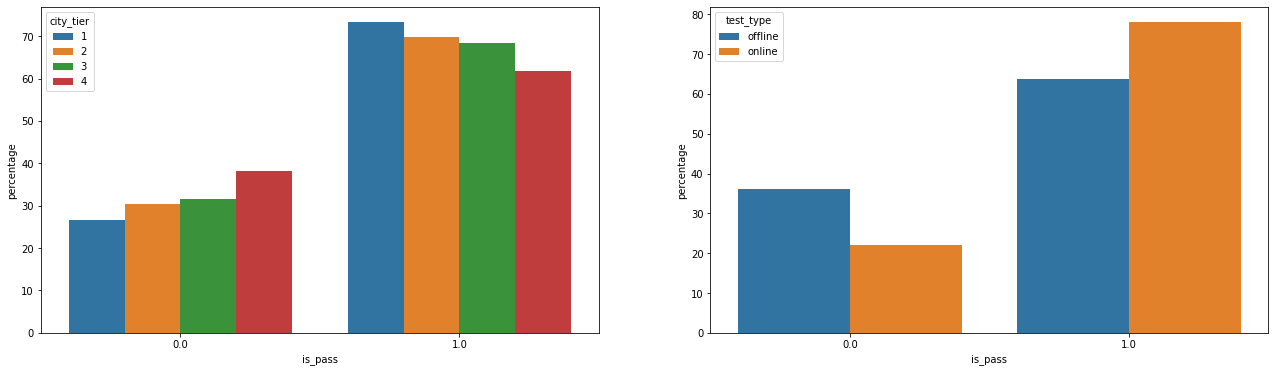

In [29]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
city_tier_counts = (df.groupby(['city_tier'])['is_pass'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('city_tier'))
sns.barplot(x="is_pass", y="percentage", hue="city_tier", data=city_tier_counts)
plt.subplot(122)
test_type_counts = (df.groupby(['test_type'])['is_pass'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('test_type'))
sns.barplot(x="is_pass", y="percentage", hue="test_type", data=test_type_counts)

<Figure size 1584x432 with 0 Axes>

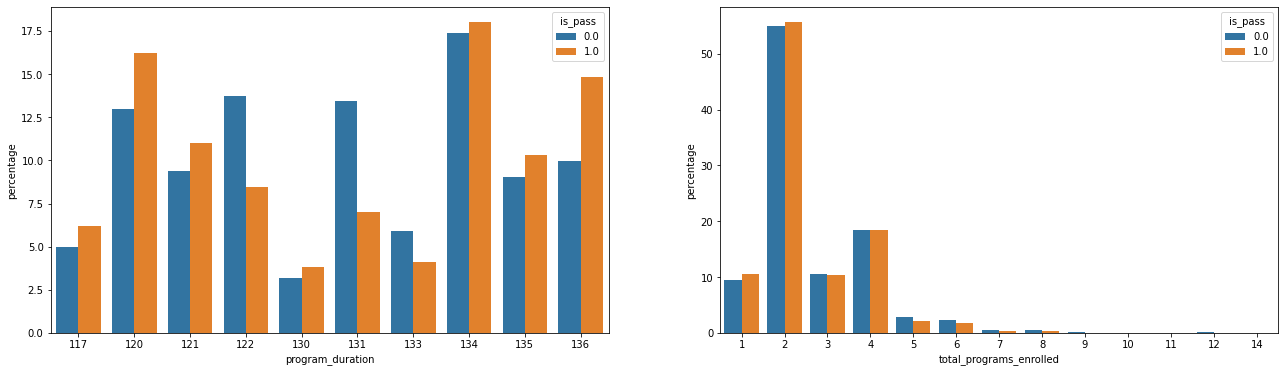

In [30]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
city_tier_counts = (df.groupby(['is_pass'])['program_duration'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="program_duration", y="percentage", hue="is_pass", data=city_tier_counts)
plt.subplot(122)
test_type_counts = (df.groupby(['is_pass'])['total_programs_enrolled'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="total_programs_enrolled", y="percentage", hue="is_pass", data=test_type_counts)

In [31]:
df.corr()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
program_duration,1.000000,0.203368,0.149458,-0.024032,-0.019115,-0.005856,0.097955,0.003545
test_id,0.203368,1.000000,0.148954,-0.002392,-0.024096,-0.134765,0.326308,0.074568
trainee_id,0.149458,0.148954,1.000000,-0.011085,0.111596,-0.074000,0.029881,0.035900
city_tier,-0.024032,-0.002392,-0.011085,1.000000,-0.070272,0.017320,-0.049050,-0.068663
age,-0.019115,-0.024096,0.111596,-0.070272,1.000000,-0.070354,0.185237,0.073969
total_programs_enrolled,-0.005856,-0.134765,-0.074000,0.017320,-0.070354,1.000000,0.083041,-0.031695
trainee_engagement_rating,0.097955,0.326308,0.029881,-0.049050,0.185237,0.083041,1.000000,0.197383
is_pass,0.003545,0.074568,0.035900,-0.068663,0.073969,-0.031695,0.197383,1.000000


## 数据清洗

In [0]:
# 提取新的一列"program_level"
df["program_level"]=df["program_id"].apply(lambda x:str(x)[2])

In [0]:
df["test_id"]=df["test_id"].astype(int)
df["city_tier"]=df["city_tier"].astype(int)
df["program_level"]=df["program_level"].astype(int)

In [0]:
def value_to_level(age):
    if age <20 :
        return "10s"
    elif age >= 20 and age <30:
        return "20s"
    elif age >= 30 and age <40:
        return "30s"
    elif age >= 40 and age <50:
        return "40s"
    elif age >= 50 and age <60:
        return "50s"
    elif age >= 60:
        return "60s"
    else:
        pass

df["age"]= df["age"].apply(value_to_level)
df["age"]=df["age"].fillna("unknown")

In [0]:
df["trainee_engagement_rating"]=df["trainee_engagement_rating"].fillna(df["trainee_engagement_rating"].mode()[0])
df["trainee_engagement_rating"]=df["trainee_engagement_rating"].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         104496 non-null  object 
 1   program_id                 104496 non-null  object 
 2   program_type               104496 non-null  object 
 3   program_duration           104496 non-null  int64  
 4   test_id                    104496 non-null  int64  
 5   test_type                  104496 non-null  object 
 6   difficulty_level           104496 non-null  object 
 7   trainee_id                 104496 non-null  int64  
 8   gender                     104496 non-null  object 
 9   education                  104496 non-null  object 
 10  city_tier                  104496 non-null  int64  
 11  age                        104496 non-null  object 
 12  total_programs_enrolled    104496 non-null  int64  
 13  is_handicapped             10

In [37]:
df.sample()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level
96109,779_126,Y_3,Y,135,126,offline,intermediate,779,M,Bachelors,2,40s,3,N,2,NaN,3


In [38]:
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['program_duration', 'total_programs_enrolled']
df[numerical] = scaler.fit_transform(df[numerical])

# 显示一个经过缩放的样例记录
display(df.head(5))

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level
0,9389_150,Y_1,Y,1.000000,150,offline,intermediate,9389,M,Matriculation,3,20s,0.307692,N,1,0.0,1
1,16523_44,T_1,T,0.736842,44,offline,easy,16523,F,High School Diploma,4,20s,0.076923,N,3,1.0,1
2,13987_178,Z_2,Z,0.157895,178,online,easy,13987,M,Matriculation,1,40s,0.000000,N,2,1.0,2
3,13158_32,T_2,T,0.000000,32,offline,easy,13158,F,Matriculation,3,unknown,0.230769,N,1,1.0,2
4,10591_84,V_3,V,0.736842,84,offline,intermediate,10591,F,High School Diploma,1,40s,0.076923,N,4,1.0,3


In [0]:
# object_features = [ 'program_id','program_type', 
#         'test_type', 'difficulty_level', 'gender', 'education', 
#       'age',  'is_handicapped']
# pd.get_dummies(df,object_features)
# pd.get_dummies(df,object_features)
# all_features = pd.get_dummies(all_features).reset_index(drop=True)

In [0]:
def str2int(df,column):
    unique_values = df[column].sort_values().unique()
    value_dict = {}
    for index,value in enumerate(unique_values,start = 1):
        value_dict[value] = index
    return df[column].apply(lambda s : value_dict.get(s))

object_features = ['program_id', 'program_type', 
       'test_type', 'difficulty_level', 'gender', 'education', 
       'age',  'is_handicapped']
for f in object_features:
    df[f] = str2int(df,f)


## 特征提取

In [41]:
df.sample()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level
82968,17360_181,20,7,1.0,181,1,1,17360,1,4,3,2,0.0,1,1,NaN,1


In [0]:

trainee_pass=dict(df.groupby("trainee_id")["is_pass"].mean())
df["trainee_pass"]=df.trainee_id.map(trainee_pass)


program_pass=dict(df.groupby("program_id")["is_pass"].mean())
df["program_pass"]=df.program_id.map(program_pass)


test_pass=dict(df.groupby("test_id")["is_pass"].mean())
df["test_pass"]=df.test_id.map(test_pass)

In [0]:
edu_dict={1:4,2:2,3:5,4:3,5:1}
df["education"]=df.education.map(edu_dict)

In [0]:
difficul_dict={1:1,2:3,3:2,4:4}
df["difficulty_level"]=df.difficulty_level.map(difficul_dict)

In [45]:
df.sample(10)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level,trainee_pass,program_pass,test_pass
4276,8396_131,18,6,0.947368,131,2,1,8396,2,3,2,4,0.230769,2,5,1.0,3,1.000000,0.742111,0.936207
94857,12977_181,20,7,1.000000,181,1,1,12977,1,2,3,3,0.000000,1,1,NaN,1,0.500000,0.700481,0.530806
37024,14668_183,20,7,1.000000,183,2,1,14668,2,3,3,7,0.000000,1,1,1.0,1,1.000000,0.700481,0.822430
19804,6088_137,17,6,0.157895,137,1,2,6088,1,3,2,4,0.230769,2,1,1.0,2,0.400000,0.747937,0.868687
72203,7899_118,19,6,0.210526,118,2,1,7899,2,3,2,4,0.230769,1,4,1.0,4,0.800000,0.776203,0.906522
11022,12848_95,9,4,0.842105,95,1,1,12848,1,2,3,7,0.076923,1,1,1.0,1,1.000000,0.612790,0.801047
72335,2850_56,8,3,0.263158,56,1,4,2850,1,2,3,7,0.000000,1,2,1.0,2,1.000000,0.597462,0.538983
63329,7325_97,9,4,0.842105,97,1,3,7325,2,2,2,2,0.076923,1,2,1.0,1,0.666667,0.612790,0.699387
76996,4342_64,7,3,0.894737,64,2,1,4342,1,2,3,4,0.230769,1,3,NaN,1,0.000000,0.643218,0.635104
88809,18853_12,6,2,0.157895,12,1,2,18853,1,2,1,4,0.230769,2,2,NaN,4,0.666667,0.742279,0.606742


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         104496 non-null  object 
 1   program_id                 104496 non-null  int64  
 2   program_type               104496 non-null  int64  
 3   program_duration           104496 non-null  float64
 4   test_id                    104496 non-null  int64  
 5   test_type                  104496 non-null  int64  
 6   difficulty_level           104496 non-null  int64  
 7   trainee_id                 104496 non-null  int64  
 8   gender                     104496 non-null  int64  
 9   education                  104496 non-null  int64  
 10  city_tier                  104496 non-null  int64  
 11  age                        104496 non-null  int64  
 12  total_programs_enrolled    104496 non-null  float64
 13  is_handicapped             10

In [47]:
df.describe()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_level,trainee_pass,program_pass,test_pass
count,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,73147.000000,104496.000000,103149.000000,104496.000000,104496.000000
mean,11.811170,4.263503,0.589968,90.937672,1.404226,1.650781,9846.168045,1.534690,2.690333,2.248478,4.615248,0.122017,1.088511,2.396331,0.695408,2.361516,0.698651,0.695180,0.695084
std,5.991629,1.817054,0.362779,51.219793,0.490744,0.825037,5706.697072,0.498798,0.767270,1.011789,2.006397,0.095263,0.284037,1.327204,0.460238,1.101691,0.326690,0.086274,0.138772
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.505393,0.201681
25%,6.000000,2.000000,0.210526,45.000000,1.000000,1.000000,5041.000000,1.000000,2.000000,1.000000,3.000000,0.076923,1.000000,1.000000,0.000000,1.000000,0.500000,0.612790,0.602076
50%,12.000000,4.000000,0.736842,90.000000,1.000000,1.000000,9648.500000,2.000000,3.000000,2.000000,4.000000,0.076923,1.000000,2.000000,1.000000,2.000000,0.800000,0.734315,0.697674
75%,17.000000,6.000000,0.894737,135.000000,2.000000,2.000000,14555.250000,2.000000,3.000000,3.000000,7.000000,0.153846,1.000000,4.000000,1.000000,3.000000,1.000000,0.747937,0.801047
max,22.000000,7.000000,1.000000,187.000000,2.000000,4.000000,20098.000000,2.000000,5.000000,4.000000,7.000000,1.000000,2.000000,5.000000,1.000000,4.000000,1.000000,0.839140,0.955752


In [0]:
# df["trainee_pass"]=df["trainee_pass"].fillna(0.8)

## 划分训练集、测试集

In [0]:
df=df.set_index("id")
df_train_,df_test=df.iloc[:73147,:],df.iloc[-31349:,:]
df_train=df_train_.drop(columns=["is_pass"])
df_test=df_test.drop(columns=["is_pass"])
df_lable=df_train_["is_pass"]

In [50]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73147 entries, 9389_150 to 4467_119
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   program_id                 73147 non-null  int64  
 1   program_type               73147 non-null  int64  
 2   program_duration           73147 non-null  float64
 3   test_id                    73147 non-null  int64  
 4   test_type                  73147 non-null  int64  
 5   difficulty_level           73147 non-null  int64  
 6   trainee_id                 73147 non-null  int64  
 7   gender                     73147 non-null  int64  
 8   education                  73147 non-null  int64  
 9   city_tier                  73147 non-null  int64  
 10  age                        73147 non-null  int64  
 11  total_programs_enrolled    73147 non-null  float64
 12  is_handicapped             73147 non-null  int64  
 13  trainee_engagement_rating  73147 non-null

## KNN填充trainee_pass空值

In [0]:
knn_test=df_test[df_test.isnull().T.any()].drop(columns=["trainee_pass"])

In [52]:
knn_test

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,program_level,program_pass,test_pass
id,,,,,,,,,,,,,,,,,
10150_125,18,6,0.947368,125,1,2,10150,1,2,1,3,0.230769,1,2,3,0.742111,0.802969
17292_94,9,4,0.842105,94,1,1,17292,2,2,2,3,0.076923,1,1,1,0.612790,0.632124
9725_125,18,6,0.947368,125,1,2,9725,1,3,3,7,0.153846,1,4,3,0.742111,0.802969
3906_95,9,4,0.842105,95,1,1,3906,2,4,1,3,0.076923,1,1,1,0.612790,0.801047
10021_101,15,5,1.000000,101,1,2,10021,2,3,3,3,0.230769,1,1,3,0.801660,0.839674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19644_6,1,1,0.947368,6,1,2,19644,2,2,1,3,0.230769,1,1,1,0.526398,0.464567
520_87,10,4,0.210526,87,1,1,520,1,3,3,2,0.230769,1,1,2,0.574895,0.608374
4597_32,4,2,0.000000,32,1,1,4597,1,3,1,4,0.230769,1,1,2,0.740506,0.641129


In [53]:
knn_train=df_train
knn_label=knn_train["trainee_pass"]
knn_train=knn_train.drop(columns=["trainee_pass"])
knn_test=df_test[df_test.isnull().T.any()].drop(columns=["trainee_pass"])

from sklearn.neighbors import KNeighborsRegressor
 
clf = KNeighborsRegressor(n_neighbors = 5, weights = "distance")
clf.fit(knn_train, knn_label)
trainee_pass_null=clf.predict(knn_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [0]:
null_index=df_test[df_test.isnull().T.any()].index

In [0]:
df_test.loc[null_index]["trainee_pass"]=trainee_pass_null

## 数据再探索

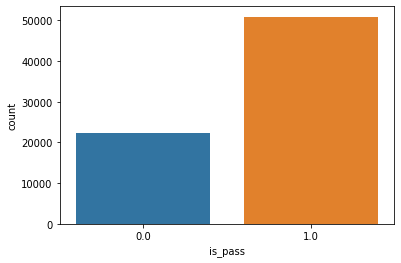

In [56]:
sns.countplot(x="is_pass", data=df_train_);

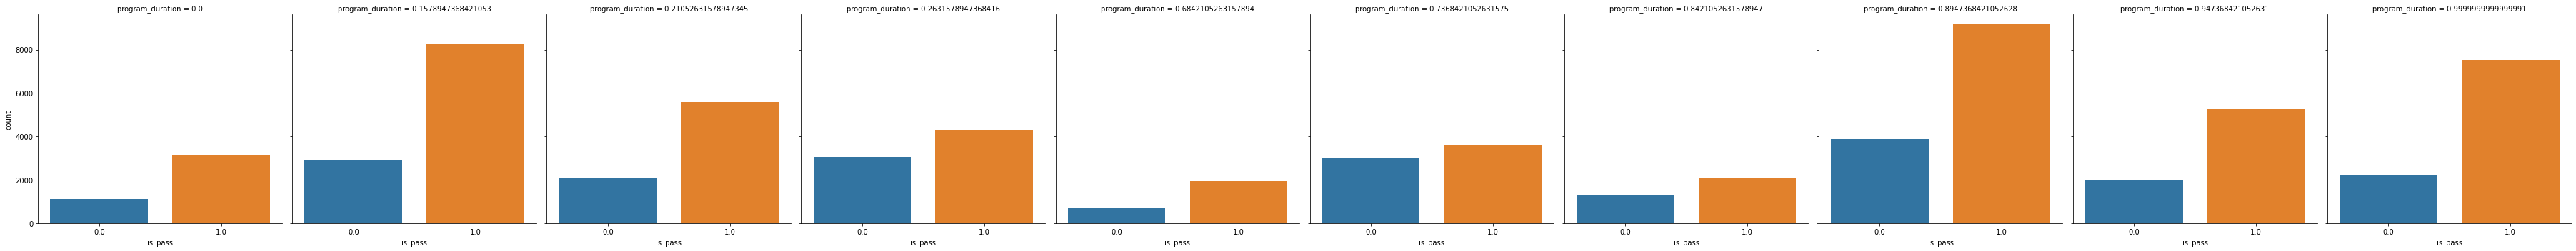

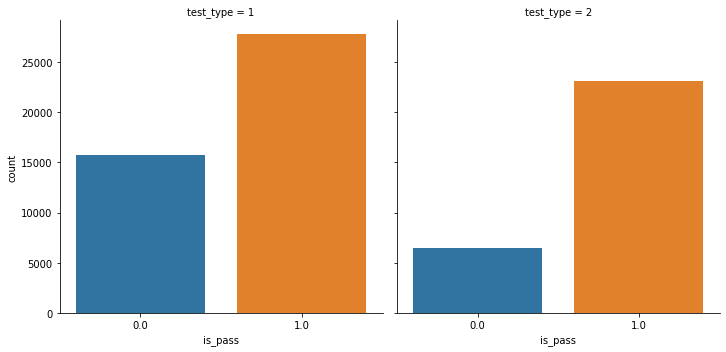

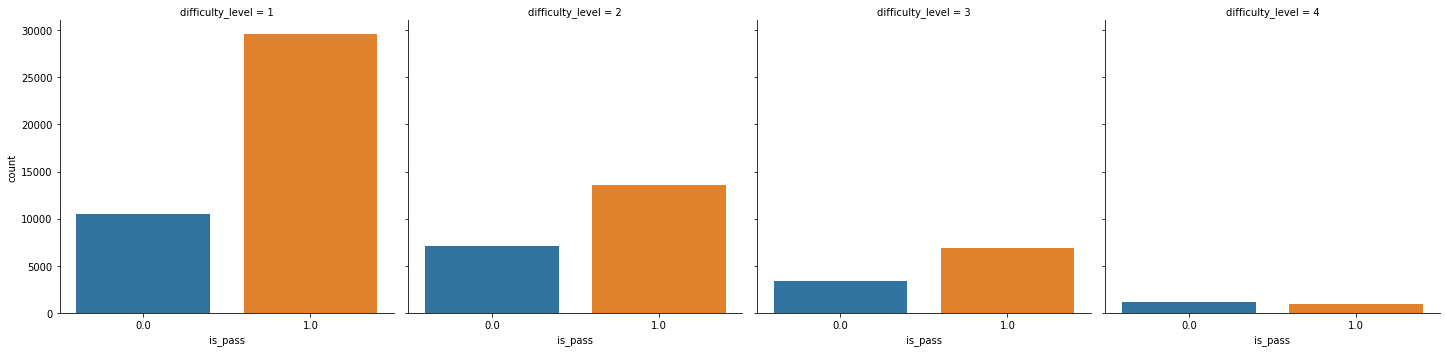

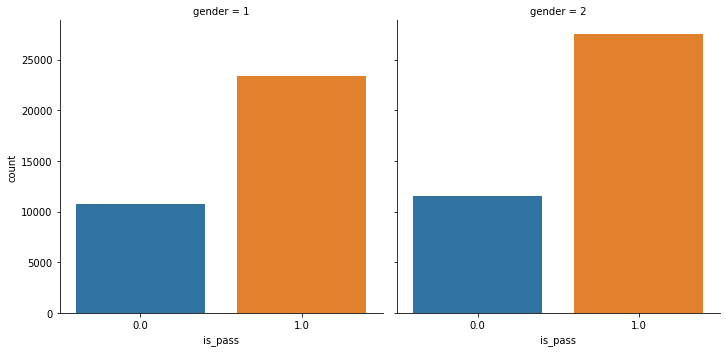

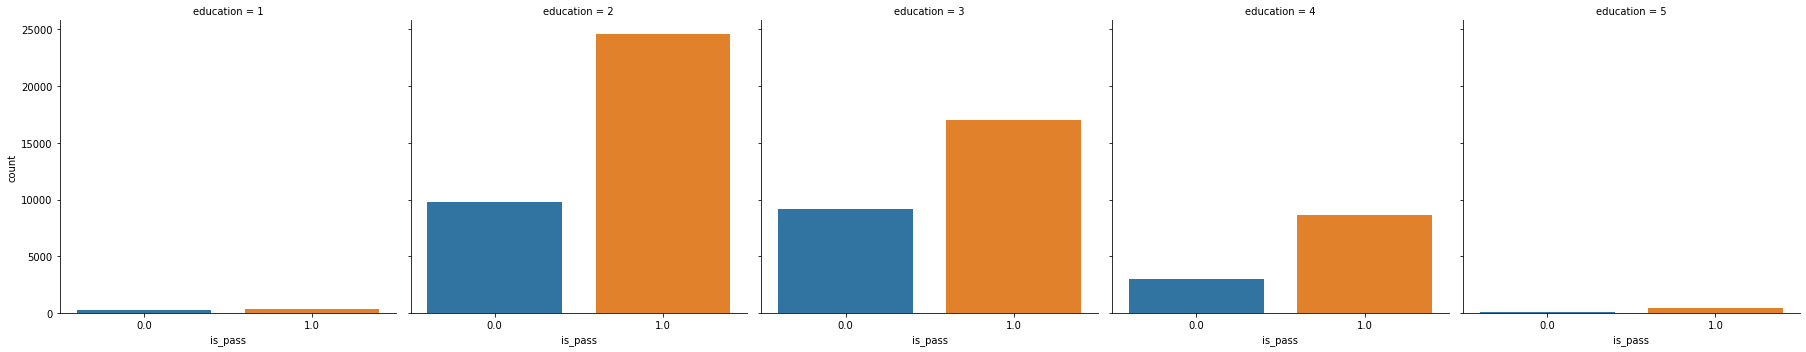

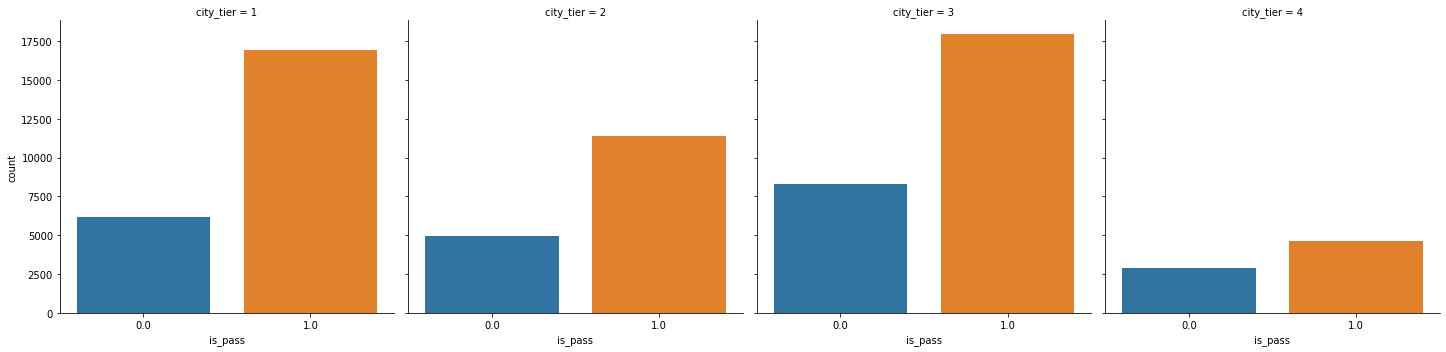

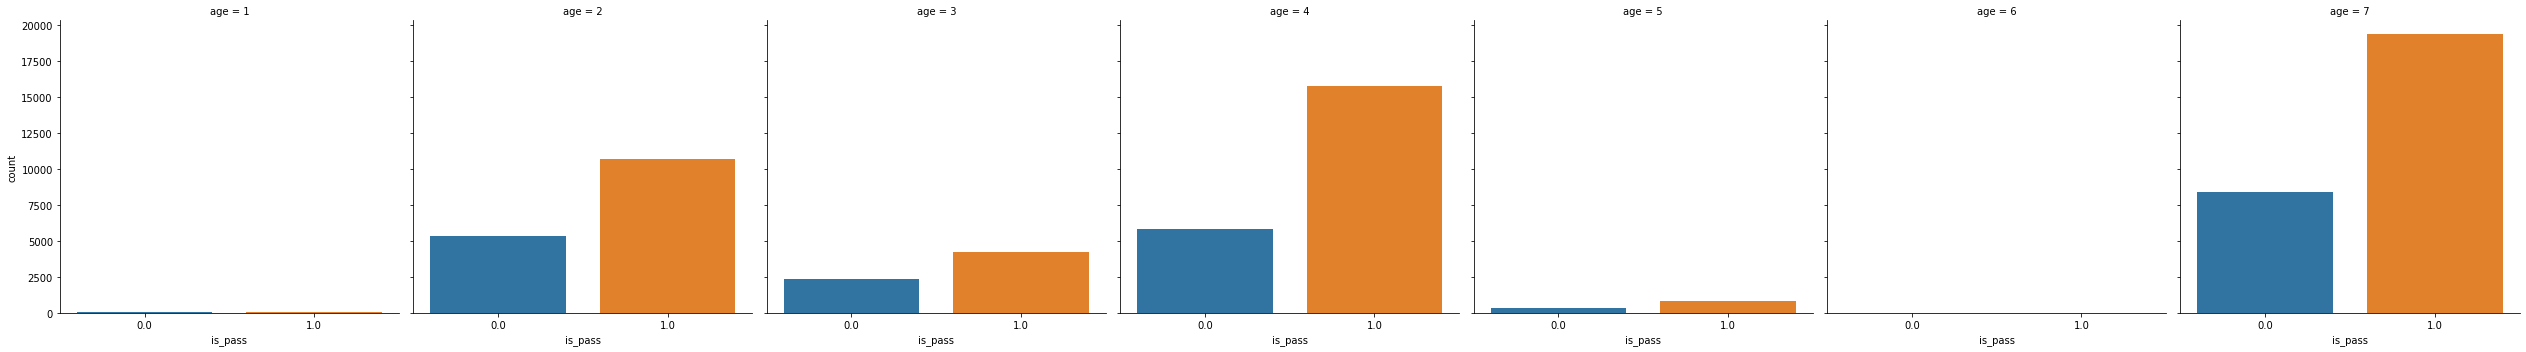

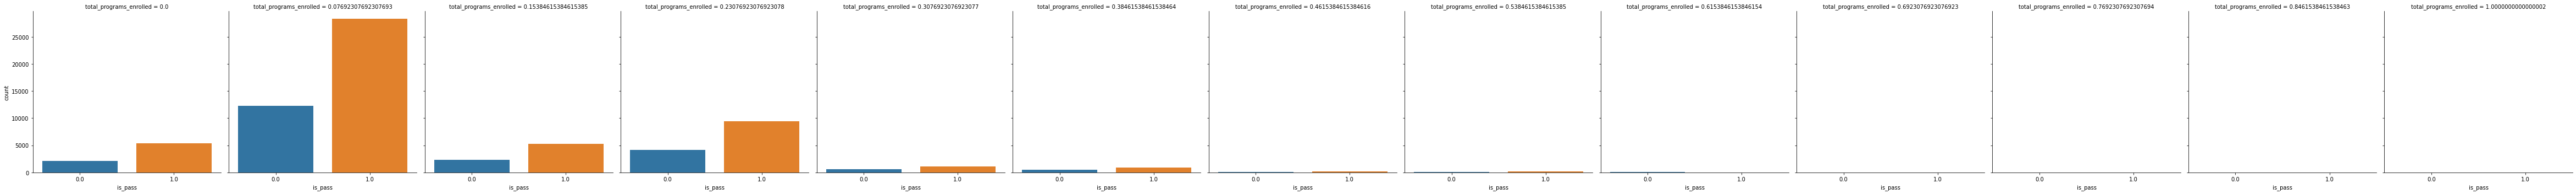

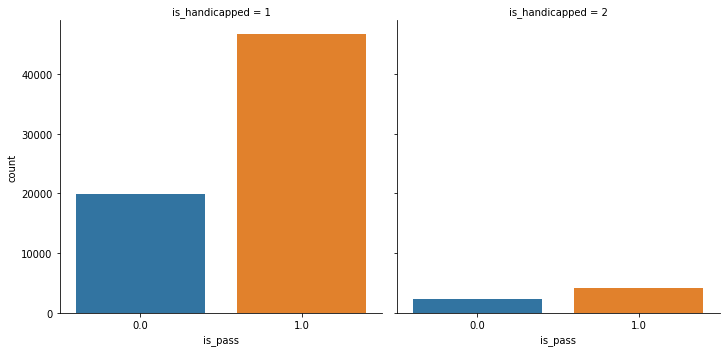

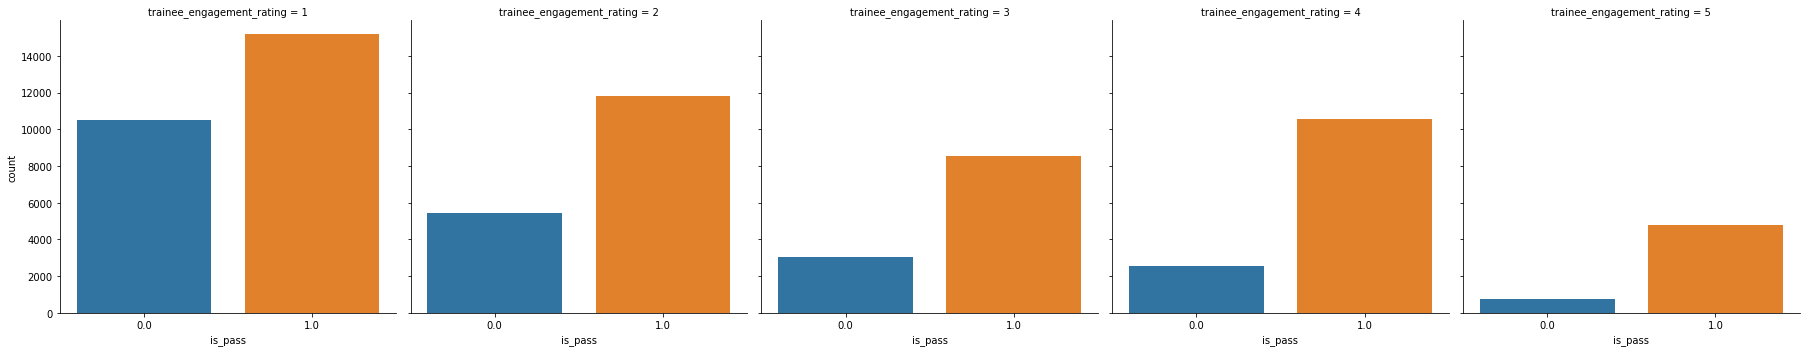

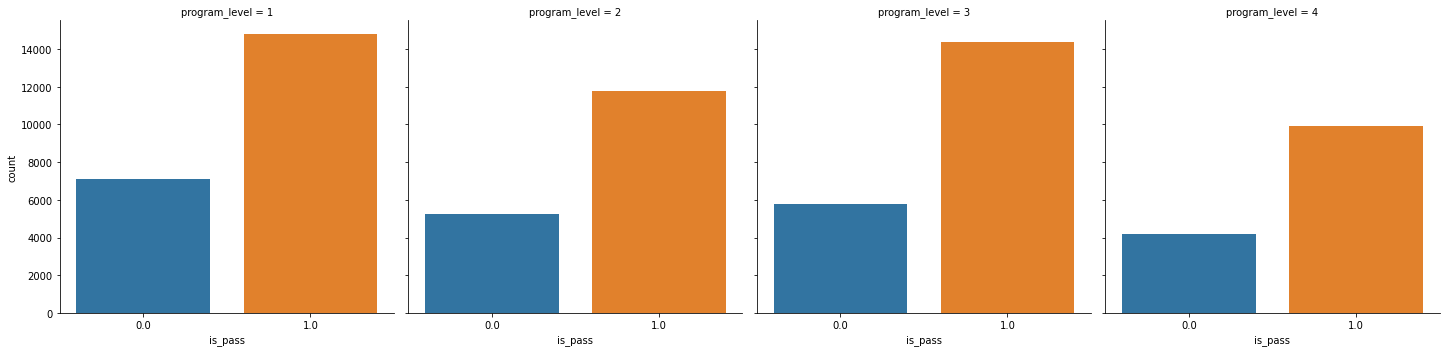

In [57]:
columns=[ 'program_duration',
       'test_type', 'difficulty_level','gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'program_level']
for column in columns:
    display(sns.factorplot(x='is_pass', col=column, kind='count', data=df_train_));

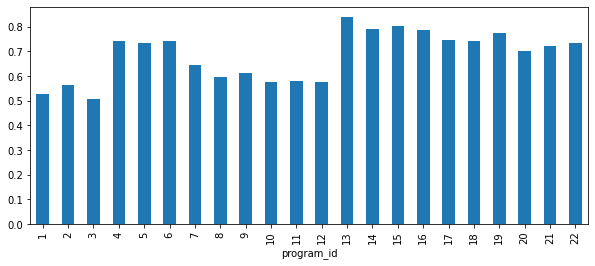

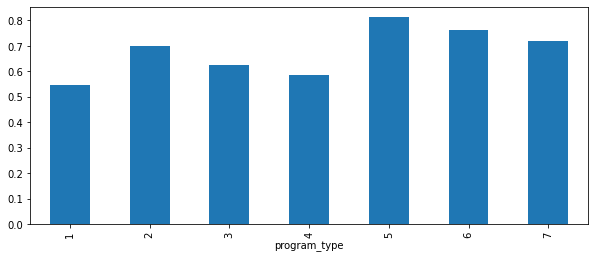

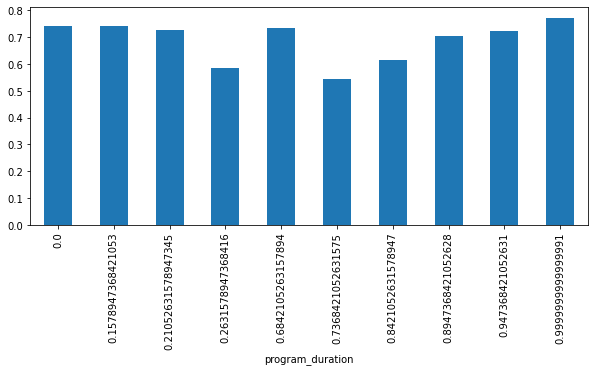

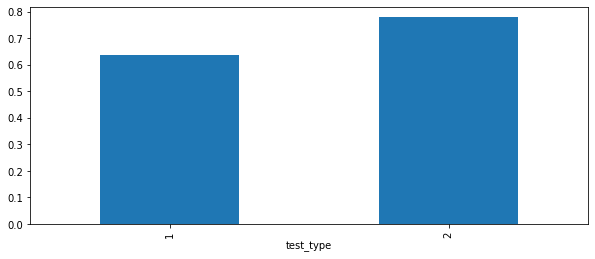

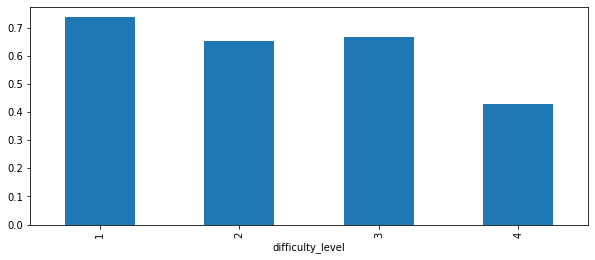

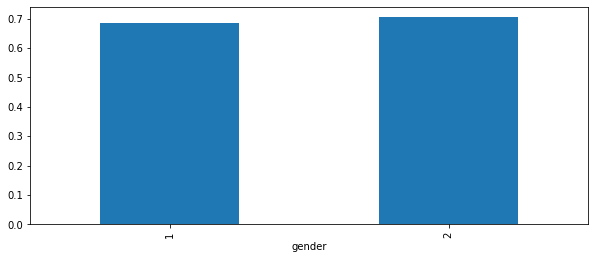

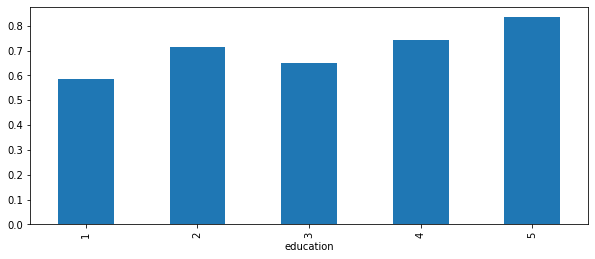

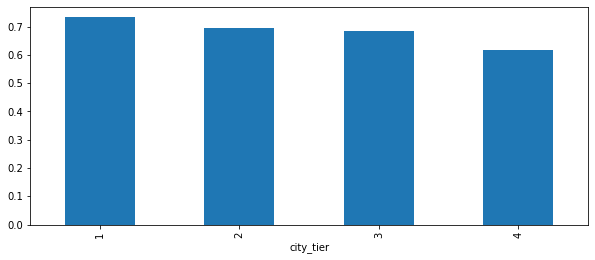

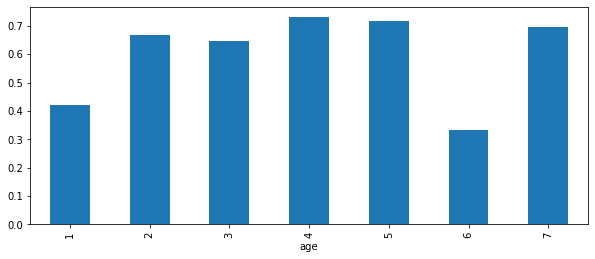

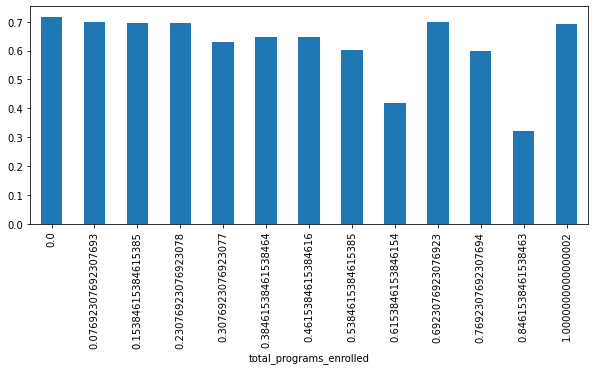

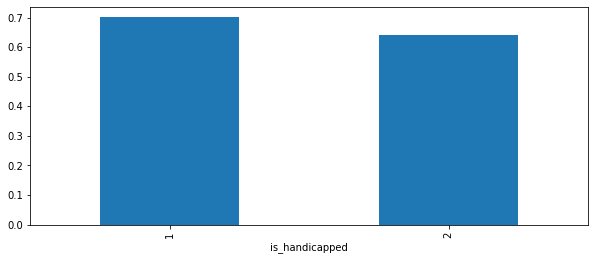

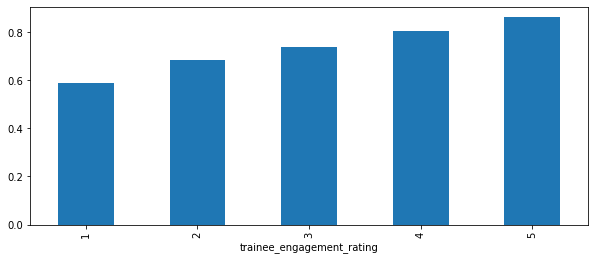

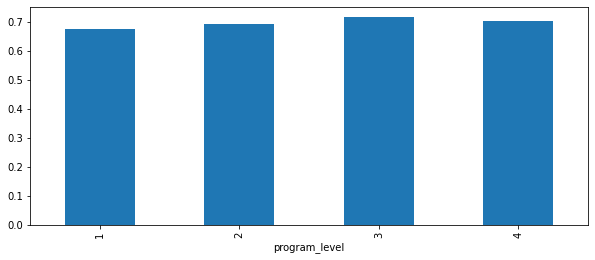

In [58]:
columns=[ 'program_id','program_type','program_duration',
       'test_type', 'difficulty_level','gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'program_level']
for column in columns:
    display(df_train_.groupby(column).mean()["is_pass"].plot(kind="bar", figsize=(10,4), fontsize=10));
    plt.show()

<Figure size 800x640 with 0 Axes>

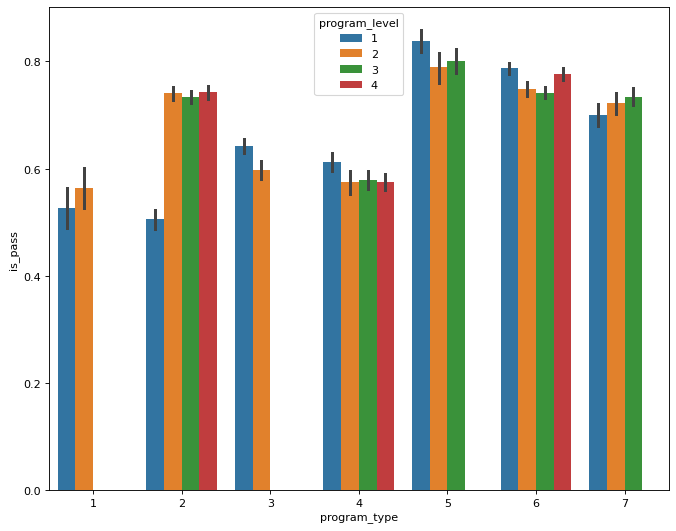

In [59]:
plt.figure(figsize=(10,8), dpi= 80)
sns.barplot(x=df_train_["program_type"],y=df_train_["is_pass"],hue=df_train_["program_level"],data=df_train_)

**大致比较上图，可以了解到测验通过率：  
'program_id'通过率分布在'program_type'组内主要受program_level影响大；  
'program_type'各组表现不同；  
'test_type'的分类线上比线下高；  
'difficulty_level'是难度越高通过率越低；  
'gender'分类下通过率没有太大区别；  
'education'基本学历越高通过率越高；'city_tier'数值越大，通过率越低；  
'age’分三个组，40-60最高，然后20，最低的是20岁以下的；  
'total_programs_enrolled'整体是越多的话，就通过率越低；  
'is_handicapped'残疾的通过率稍微低一点；  
'trainee_engagement_rating'评分越高通过率越高;
'program_level'各programme type组内表现不一。**

In [0]:
# ['id', 'program_id', 'program_type', 'program_duration', 'test_id',
#        'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
#        'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
#        'trainee_engagement_rating', 'is_pass', 'program_level'],
#       dtype='object'

<Figure size 1080x720 with 0 Axes>

(19.5, -0.5)

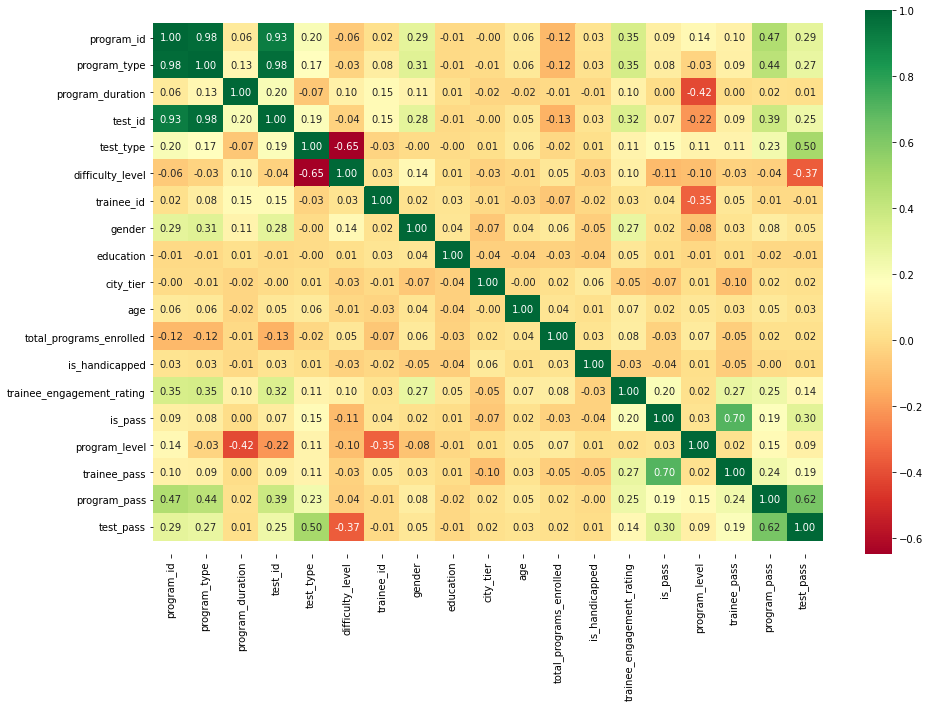

In [61]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_train_.corr(), cmap=plt.cm.RdYlGn, annot=True, fmt=".2f")
# 注意：Matplotlib 3.1.1版本的bug，heatmap的首行与末行会显示不全。
# 可手动调整y轴的范围来进行修复。（老版本的Matplotlib不需要调整y轴范围。）
a, b = ax.get_ylim()
ax.set_ylim(a + 0.5, b - 0.5)

## 数据离散程度、数据标准差

## 特征选取（降维）

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73147 entries, 9389_150 to 4467_119
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   program_id                 73147 non-null  int64  
 1   program_type               73147 non-null  int64  
 2   program_duration           73147 non-null  float64
 3   test_id                    73147 non-null  int64  
 4   test_type                  73147 non-null  int64  
 5   difficulty_level           73147 non-null  int64  
 6   trainee_id                 73147 non-null  int64  
 7   gender                     73147 non-null  int64  
 8   education                  73147 non-null  int64  
 9   city_tier                  73147 non-null  int64  
 10  age                        73147 non-null  int64  
 11  total_programs_enrolled    73147 non-null  float64
 12  is_handicapped             73147 non-null  int64  
 13  trainee_engagement_rating  73147 non-null

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31349 entries, 1626_45 to 9004_107
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   program_id                 31349 non-null  int64  
 1   program_type               31349 non-null  int64  
 2   program_duration           31349 non-null  float64
 3   test_id                    31349 non-null  int64  
 4   test_type                  31349 non-null  int64  
 5   difficulty_level           31349 non-null  int64  
 6   trainee_id                 31349 non-null  int64  
 7   gender                     31349 non-null  int64  
 8   education                  31349 non-null  int64  
 9   city_tier                  31349 non-null  int64  
 10  age                        31349 non-null  int64  
 11  total_programs_enrolled    31349 non-null  float64
 12  is_handicapped             31349 non-null  int64  
 13  trainee_engagement_rating  31349 non-null 

In [0]:
# from fancyimpute import KNN
 
# df_test = pd.DataFrame(KNN(k=6).fit_transform(df_test), columns="trainee_pass")

In [65]:
from sklearn.ensemble import RandomForestClassifier

names = df.columns

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(df_train, df_lable)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Features sorted by their score:
[(0.5015, 'program_level'), (0.1027, 'trainee_id'), (0.0992, 'program_pass'), (0.0501, 'test_id'), (0.0373, 'trainee_engagement_rating'), (0.0339, 'city_tier'), (0.0312, 'age'), (0.0287, 'total_programs_enrolled'), (0.0269, 'education'), (0.0173, 'trainee_pass'), (0.0138, 'difficulty_level'), (0.0127, 'gender'), (0.0096, 'program_id'), (0.0092, 'test_type'), (0.0086, 'is_handicapped'), (0.0064, 'program_duration'), (0.0058, 'program_type'), (0.0052, 'is_pass')]


<BarContainer object of 18 artists>

([<matplotlib.axis.YTick at 0x7efff8e80e80>,
 [Text(0, 0, 'is_pass'),
  Text(0, 0, 'program_type'),
  Text(0, 0, 'program_duration'),
  Text(0, 0, 'is_handicapped'),
  Text(0, 0, 'test_type'),
  Text(0, 0, 'program_id'),
  Text(0, 0, 'gender'),
  Text(0, 0, 'difficulty_level'),
  Text(0, 0, 'trainee_pass'),
  Text(0, 0, 'education'),
  Text(0, 0, 'total_programs_enrolled'),
  Text(0, 0, 'age'),
  Text(0, 0, 'city_tier'),
  Text(0, 0, 'trainee_engagement_rating'),
  Text(0, 0, 'test_id'),
  Text(0, 0, 'program_pass'),
  Text(0, 0, 'trainee_id'),
  Text(0, 0, 'program_level')])

Text(0.5, 0, 'Relative Importance')

Text(0.5, 1.0, 'Variable Importance')

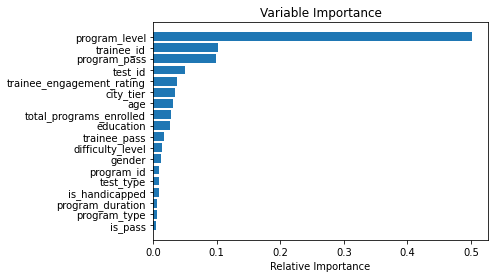

In [66]:
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

# 模型选取

In [0]:
# df_train_sub=df_train.drop(columns=["program_id","program_duration","program_type"])
# df_test_sub=df_test.drop(columns=["program_id","program_duration","program_type"])

In [68]:
!pip install catboost

In [0]:
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import sklearn.model_selection as ms
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier,Pool

In [70]:
cat_features=[1,4,5,7,8,9,10,12]
train_pool=Pool(df_train,df_lable,cat_features=cat_features)
test_pool=Pool(df_test, cat_features =cat_features)  
cat=CatBoostClassifier(eval_metric="AUC")
score = ms.cross_val_score(cat, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

流式输出内容被截断，只能显示最后 5000 行内容。
7:	total: 279ms	remaining: 34.6s
8:	total: 304ms	remaining: 33.5s
9:	total: 332ms	remaining: 32.8s
10:	total: 356ms	remaining: 32s
11:	total: 382ms	remaining: 31.5s
12:	total: 414ms	remaining: 31.4s
13:	total: 439ms	remaining: 30.9s
14:	total: 466ms	remaining: 30.6s
15:	total: 493ms	remaining: 30.3s
16:	total: 520ms	remaining: 30.1s
17:	total: 551ms	remaining: 30.1s
18:	total: 579ms	remaining: 29.9s
19:	total: 607ms	remaining: 29.7s
20:	total: 643ms	remaining: 30s
21:	total: 671ms	remaining: 29.8s
22:	total: 698ms	remaining: 29.6s
23:	total: 724ms	remaining: 29.4s
24:	total: 750ms	remaining: 29.3s
25:	total: 778ms	remaining: 29.1s
26:	total: 804ms	remaining: 29s
27:	total: 833ms	remaining: 28.9s
28:	total: 865ms	remaining: 28.9s
29:	total: 893ms	remaining: 28.9s
30:	total: 920ms	remaining: 28.7s
31:	total: 947ms	remaining: 28.6s
32:	total: 972ms	remaining: 28.5s
33:	total: 1s	remaining: 28.4s
34:	total: 1.03s	remaining: 28.5s
35:	total: 1.06s	remaining: 28.4s

In [71]:
gbm = lgb.LGBMClassifier(objective = 'binary',
                         is_unbalance = True,
                         metric = 'binary_logloss,auc',
                         max_depth = 6,
                         num_leaves = 40,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
score = ms.cross_val_score(gbm, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.94329264 0.9427368  0.94391966 0.94238583 0.94408432]
accuracy mean= 0.9432838503089155


In [72]:
xgb=XGBClassifier(max_depth=10,subsample=0.7,colsample_bytree=0.75,reg_lambda=0.1,n_estimators=300)
score = ms.cross_val_score(xgb, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.92412264 0.92316651 0.92600171 0.925313   0.92457639]
accuracy mean= 0.9246360538073137


In [73]:
sgd= linear_model.SGDClassifier()
score = ms.cross_val_score(sgd, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.56220974 0.54850564 0.54835974 0.55464197 0.54347667]
accuracy mean= 0.5514387525444057


In [74]:
random_forest = RandomForestClassifier(n_estimators=100)
score = ms.cross_val_score(random_forest, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.92929556 0.92878795 0.93116841 0.92958585 0.92959942]
accuracy mean= 0.9296874368747858


In [75]:
logreg = LogisticRegression()
score = ms.cross_val_score(logreg, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.87798279 0.86752881 0.79177233 0.78579127 0.8724121 ]
accuracy mean= 0.8390974604349019


In [76]:
knn = KNeighborsClassifier(n_neighbors = 3)
score = ms.cross_val_score(knn, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.70471531 0.71257027 0.71301153 0.71187384 0.70659473]
accuracy mean= 0.7097531381932664


In [77]:
gaussian = GaussianNB()
score = ms.cross_val_score(gaussian, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.8857719  0.88019588 0.88709151 0.87991193 0.88365447]
accuracy mean= 0.8833251395717312


In [78]:
perceptron = Perceptron()
score = ms.cross_val_score(perceptron, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.52836094 0.52326342 0.48773302 0.52871404 0.52921101]
accuracy mean= 0.5194564861022073


In [79]:
linear_svc = LinearSVC()
score = ms.cross_val_score(linear_svc, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.7415852  0.88516576 0.8894861  0.88335146 0.91772389]
accuracy mean= 0.8634624814663194


In [80]:
decision_tree = DecisionTreeClassifier()
score = ms.cross_val_score(decision_tree, df_train, df_lable, cv=5, scoring='roc_auc')
print('accuracy score=', score)
print('accuracy mean=', score.mean())

accuracy score= [0.78719961 0.7860923  0.78668195 0.78239491 0.78582508]
accuracy mean= 0.7856387697997196


## 挑选模型参数

In [81]:
parameters = {
'min_child_samples':[300,500,800],
'min_child_weight': [0.001,0.002]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.7,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=21,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0.001,
                                      reg_lambda=8, silent=Tr

参数的最佳取值:{'min_child_samples': 800, 'min_child_weight': 0.001}
最佳模型得分:0.9427243181388235
[0.94123555 0.94123555 0.9420515  0.9420515  0.94272432 0.94272432]
[{'min_child_samples': 300, 'min_child_weight': 0.001}, {'min_child_samples': 300, 'min_child_weight': 0.002}, {'min_child_samples': 500, 'min_child_weight': 0.001}, {'min_child_samples': 500, 'min_child_weight': 0.002}, {'min_child_samples': 800, 'min_child_weight': 0.001}, {'min_child_samples': 800, 'min_child_weight': 0.002}]


In [82]:
parameters = {
    'feature_fraction': [0.6, 0.8, 1],
}
gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )

gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.7,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0.001,
                                      reg_lambda=8, silent=T

参数的最佳取值:{'feature_fraction': 0.8}
最佳模型得分:0.9427171529405111
[0.94257207 0.94271715 0.94260223]
[{'feature_fraction': 0.6}, {'feature_fraction': 0.8}, {'feature_fraction': 1}]


In [83]:
parameters = {
     'bagging_fraction': [0.8,0.9,1],
     'bagging_freq': [2,3,4],
}
gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0.001,
                                      reg_lambda=8, silent=T

参数的最佳取值:{'bagging_fraction': 1, 'bagging_freq': 2}
最佳模型得分:0.9427171529405111
[0.94224291 0.94214139 0.94216638 0.94218394 0.94227199 0.94224138
 0.94271715 0.94271715 0.94271715]
[{'bagging_fraction': 0.8, 'bagging_freq': 2}, {'bagging_fraction': 0.8, 'bagging_freq': 3}, {'bagging_fraction': 0.8, 'bagging_freq': 4}, {'bagging_fraction': 0.9, 'bagging_freq': 2}, {'bagging_fraction': 0.9, 'bagging_freq': 3}, {'bagging_fraction': 0.9, 'bagging_freq': 4}, {'bagging_fraction': 1, 'bagging_freq': 2}, {'bagging_fraction': 1, 'bagging_freq': 3}, {'bagging_fraction': 1, 'bagging_freq': 4}]


In [84]:
parameters = {
     'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100...
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0.001,
                                      reg_lambda=8, silent=True, subsample=1.0,
                                      subsample

参数的最佳取值:{'reg_alpha': 0, 'reg_lambda': 0.03}
最佳模型得分:0.9425089729345385
[0.94239337 0.94227489 0.94226722 0.94250897 0.94238684 0.94230587
 0.94234926 0.9424037  0.94237592 0.94231436 0.94230185 0.94234077
 0.94238079 0.94245626 0.94229291 0.94227294 0.9422472  0.94238297
 0.94240935 0.94235034 0.94230114 0.94231553 0.94228067 0.94236146
 0.94236883 0.94231495 0.94243629 0.94232734 0.94229968 0.94228015
 0.94221738 0.94235318 0.94239019 0.94235542 0.94241488 0.94216651
 0.94218684 0.94222675 0.94238924 0.94234555 0.94235788 0.94229676
 0.94234615 0.9423193  0.94229418 0.94226391 0.94229743 0.94230002
 0.94239294]
[{'reg_alpha': 0, 'reg_lambda': 0}, {'reg_alpha': 0, 'reg_lambda': 0.001}, {'reg_alpha': 0, 'reg_lambda': 0.01}, {'reg_alpha': 0, 'reg_lambda': 0.03}, {'reg_alpha': 0, 'reg_lambda': 0.08}, {'reg_alpha': 0, 'reg_lambda': 0.3}, {'reg_alpha': 0, 'reg_lambda': 0.5}, {'reg_alpha': 0.001, 'reg_lambda': 0}, {'reg_alpha': 0.001, 'reg_lambda': 0.001}, {'reg_alpha': 0.001, 'reg_lambda': 

In [85]:
parameters = {
     'cat_smooth': [0,10,20],
}

gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0,
                         reg_lambda = 0.03,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0,
                                      reg_lambda=0.03, silent=Tr

参数的最佳取值:{'cat_smooth': 0}
最佳模型得分:0.9425089729345385
[0.94250897 0.94250897 0.94250897]
[{'cat_smooth': 0}, {'cat_smooth': 10}, {'cat_smooth': 20}]


In [86]:
parameters = {
     'learning_rate': [0.1,0.01,0.001],
    'num_iterations':[250,300,500,1000]
}
gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.1,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0,
                         reg_lambda = 0.03,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(df_train, df_lable)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      boosting_type='gbdt', cat_smooth=0,
                                      class_weight=None, colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=10,
                                      metric='binary_logloss,auc',
                                      min_child_samples=800,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=200,
                                      num_leaves=100, objective='binary',
                                      random_state=None, reg_alpha=0,
                                      reg_lambda=0.03, silent=Tr

参数的最佳取值:{'learning_rate': 0.01, 'num_iterations': 1000}
最佳模型得分:0.9436376810312949
[0.94191196 0.94127072 0.9390584  0.93514606 0.94228133 0.94270234
 0.94350932 0.94363768 0.93759952 0.93801353 0.93892682 0.94004625]
[{'learning_rate': 0.1, 'num_iterations': 250}, {'learning_rate': 0.1, 'num_iterations': 300}, {'learning_rate': 0.1, 'num_iterations': 500}, {'learning_rate': 0.1, 'num_iterations': 1000}, {'learning_rate': 0.01, 'num_iterations': 250}, {'learning_rate': 0.01, 'num_iterations': 300}, {'learning_rate': 0.01, 'num_iterations': 500}, {'learning_rate': 0.01, 'num_iterations': 1000}, {'learning_rate': 0.001, 'num_iterations': 250}, {'learning_rate': 0.001, 'num_iterations': 300}, {'learning_rate': 0.001, 'num_iterations': 500}, {'learning_rate': 0.001, 'num_iterations': 1000}]


In [0]:
gbm = lgb.LGBMClassifier(objective = 'binary',
                         metric = 'binary_logloss,auc',
                         max_depth = 10,
                         num_leaves = 100,
                         learning_rate = 0.01,
                         feature_fraction = 0.8,
                         min_child_samples=800,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0,
                         reg_lambda = 0.03,
                         cat_smooth = 0,
                         num_iterations = 1000,   
                        )

# 提交训练结果

In [89]:
gbm.fit(df_train,df_lable)

LGBMClassifier(bagging_fraction=1, bagging_freq=2, boosting_type='gbdt',
               cat_smooth=0, class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.8, importance_type='split',
               learning_rate=0.01, max_depth=10, metric='binary_logloss,auc',
               min_child_samples=800, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1,
               num_iterations=1000, num_leaves=100, objective='binary',
               random_state=None, reg_alpha=0, reg_lambda=0.03, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [91]:
df_test_p=gbm.predict(df_test)

print(df_test_p)

df_pre_gbm=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Hackathon/sample_submission_vaSxamm.csv")

df_pre_gbm["is_pass"]=df_test_p

df_pre_gbm.to_csv("sumple_test-gbm.csv",index=False)

[0. 1. 0. ... 1. 0. 1.]
